<a href="https://colab.research.google.com/github/msiddalingaiah/MachineLearning/blob/master/Text/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Email Spam Classification

See [Bayes example](https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73).

Dataset is on [Kaggle](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

Stackoverflow [download Kaggle data](https://stackoverflow.com/questions/49386920/download-kaggle-dataset-by-using-python)

More [details](https://medium.com/@ankushchoubey/how-to-download-dataset-from-kaggle-7f700d7f9198)


In [0]:
%tensorflow_version 2.x

In [0]:
!pip install kaggle

To get kaggle.json file, login to Kaggle and go to my account

Click Create New API Token

Get values from kaggle.json

In [0]:
import getpass
import os

In [0]:
os.environ['KAGGLE_USERNAME'] = "madhudotcom" # username from the json file
os.environ['KAGGLE_KEY'] = getpass.getpass('Key from kaggle.json') # key from the json file

Key from kaggle.json··········


In [0]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 81.7MB/s]


In [0]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


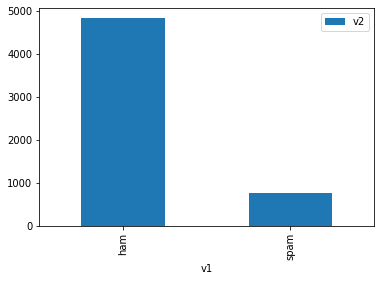

In [0]:
df.groupby('v1').count().plot.bar()

In [0]:
df[df.v1 == 'spam']['v2'].head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: v2, dtype: object

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 767.5, 511.5, -0.5)

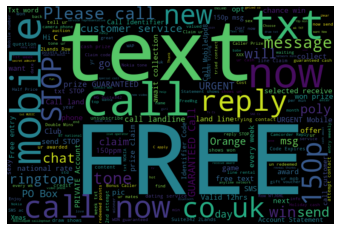

In [0]:
text = ' '.join(list(df[df.v1 == 'spam']['v2']))
spam_cloud = WordCloud(width=768, height=512).generate(text)

plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 767.5, 511.5, -0.5)

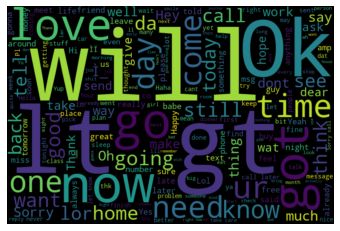

In [0]:
text = ' '.join(list(df[df.v1 == 'ham']['v2']))
ham_cloud = WordCloud(width=768, height=512).generate(text)

plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis("off")

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [0]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [0]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 7s 217ms/step - loss: 0.3282 - accuracy: 0.8765 - val_loss: 0.1256 - val_accuracy: 0.9673
Epoch 2/10
30/30 [==============================] - 6s 189ms/step - loss: 0.0840 - accuracy: 0.9813 - val_loss: 0.0617 - val_accuracy: 0.9810
Epoch 3/10
30/30 [==============================] - 6s 191ms/step - loss: 0.0389 - accuracy: 0.9868 - val_loss: 0.0770 - val_accuracy: 0.9789
Epoch 4/10
30/30 [==============================] - 6s 189ms/step - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.0669 - val_accuracy: 0.9800
Epoch 5/10
30/30 [==============================] - 6s 188ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0607 - val_accuracy: 0.9821
Epoch 6/10
30/30 [==============================] - 6s 188ms/step - loss: 0.0175 - accuracy: 0.9955 - val_loss: 0.0743 - val_accuracy: 0.9831
Epoch 7/10
30/30 [==============================] - 6s 188ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0654 - val_accuracy: 0.9810
Epoch 

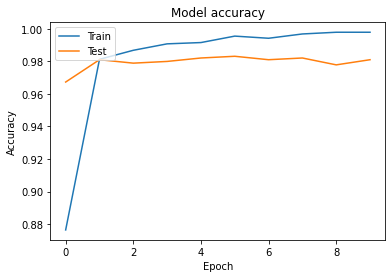

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()